## Import initial libraries

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pylab as plt

## Working with Shape File

### Loading Zip Code Shape File¶

In [133]:
from geopandas import GeoDataFrame
shape_path='NYC_zipcodes.geojson'
zip_shape = GeoDataFrame.from_file(shape_path)
zip_shape.index=zip_shape.postalCode
zip_shape = zip_shape.sort_index()
zip_shape = zip_shape.drop(['@id','BLDGpostal','CTY_FIPS','OBJECTID','ST_FIPS'], axis=1)
zip_shape

,PO_NAME,STATE,borough,geometry,latitude,longitude,postalCode
postalCode,,,,,,,
00083,Central Park,NY,Manhattan,POLYGON ((-73.94922045816277 40.79690988348278...,40.782447,-73.965573,00083
10001,New York,NY,Manhattan,POLYGON ((-74.00827017711134 40.75258714368449...,40.750215,-73.996937,10001
10002,New York,NY,Manhattan,POLYGON ((-73.97441674489379 40.73642441865476...,40.716161,-73.985688,10002
10003,New York,NY,Manhattan,POLYGON ((-73.97986374196766 40.73497446573838...,40.731929,-73.988841,10003
10004,New York,NY,Manhattan,POLYGON ((-74.04699098912498 40.69012472491997...,40.689870,-74.045269,10004
10004,New York,NY,Manhattan,"POLYGON ((-74.0241846235316 40.6839187687422, ...",40.688818,-74.019036,10004
10004,New York,NY,Manhattan,POLYGON ((-74.04166368343016 40.69644987183209...,40.698757,-74.040784,10004
10004,New York,NY,Manhattan,"POLYGON ((-74.00596661578348 40.7043243225291,...",40.703474,-74.012832,10004
10005,New York,NY,Manhattan,"POLYGON ((-74.00596661578348 40.7043243225291,...",40.706128,-74.008630,10005


### Visualize the Zipcode boundaries colored by boroughs

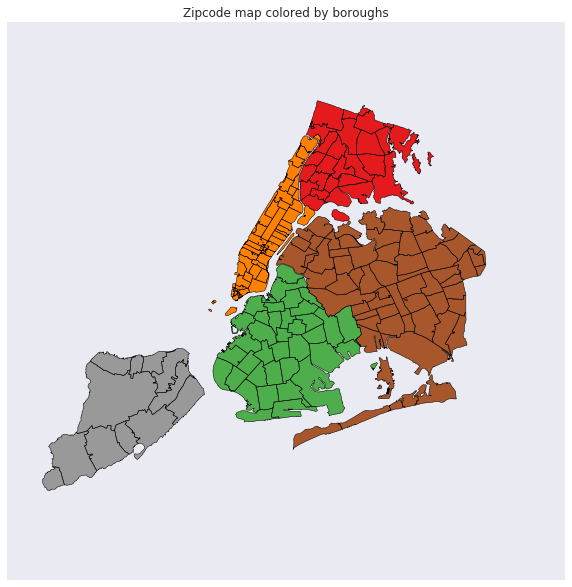

In [102]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
zip_shape.plot(column='borough',alpha=1,linewidth=0.5,ax=ax)
plt.title("Zipcode map colored by boroughs")

Figure 1: A map of the zipcodes in NYC color coded by borough.

### Load Crime data

In [103]:
df_crime=DataFrame.from_csv('Data/crime_latlon_zips.csv')
df_crime.head()

,lat,lon,zipcode,crimes
0,40.675955,-73.735304,11422,5.0
1,40.804214,-73.964751,10025,188.0
2,40.670460,-73.882559,11208,65.0
3,40.822017,-73.938915,10039,266.0
4,40.749871,-73.898905,11377,63.0


### Add the crime averages to the zipcode shapefile 

In [104]:
crimes_by_zip = df_crime.groupby('zipcode').sum()[['crimes']]
crimes_by_zip.head()

,crimes
zipcode,
00083,4834.0
10001,75590.0
10002,52297.0
10003,54137.0
10004,4323.0


In [134]:
zip_shape = zip_shape.merge(crimes_by_zip, left_index=True, right_index=True)

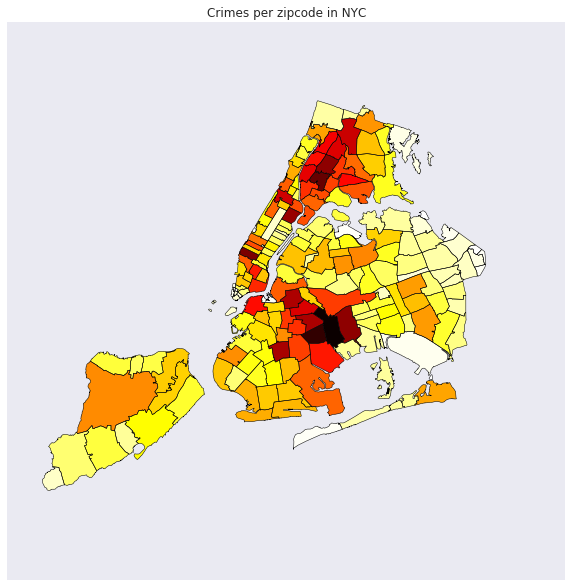

In [106]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
zip_shape.plot(column='crimes',colormap='hot_r',alpha=1,linewidth=0.5,ax=ax)
plt.title("Crimes per zipcode in NYC")

Figure 2: A plot of the crimes per zipcode in NYC. There appears to be clusters of zipcodes with high crime in West Bronx and around Brownsville, Brooklyn

### Export Shapefile Zips w/ crime data

In [107]:
path='crime_latlon_zips_out.shp'
zip_shape.to_file(path)

## Geospatial Analysis

In [108]:
import pysal as ps

### Spatial Weights
Contiguity: Queen Weights indicate whether shapes share common boundaries

In [109]:
qW_Zip=ps.queen_from_shapefile(path)

('Island ids: ', [4, 5, 6, 36, 43, 80, 81, 99, 135, 162, 198, 199, 201])


#### Neighbors of index10

In [110]:
qW_Zip[10]

{9: 1.0, 15: 1.0, 40: 1.0, 44: 1.0, 52: 1.0, 53: 1.0}

In [111]:
qW_Zip.cardinalities[10]

6

#### Matrix of Weights

In [112]:
Wmatrix, ids = qW_Zip.full()

In [113]:
Wmatrix

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

#### Change the matrix to be row-standardized

In [114]:
qW_Zip.transform = 'r'

('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 5, ' is an island (no neighbors)')
('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 36, ' is an island (no neighbors)')
('WARNING: ', 43, ' is an island (no neighbors)')
('WARNING: ', 80, ' is an island (no neighbors)')
('WARNING: ', 81, ' is an island (no neighbors)')
('WARNING: ', 99, ' is an island (no neighbors)')
('WARNING: ', 135, ' is an island (no neighbors)')
('WARNING: ', 162, ' is an island (no neighbors)')
('WARNING: ', 198, ' is an island (no neighbors)')
('WARNING: ', 199, ' is an island (no neighbors)')
('WARNING: ', 201, ' is an island (no neighbors)')


### Spatial Lag  
Similarity of Zip neighbors can be meseard by means of spatial lag as follow:
$$CrimeCountLag = \sum_j w_{i,j} CrimeCount$$

In [115]:
CrimeCount=zip_shape.crimes
CrimeCountLag=ps.lag_spatial(qW_Zip, CrimeCount)

#### Create Quantiles for maping

In [116]:
CrimeCountLagQ10 = ps.Quantiles(CrimeCountLag, k=10)
CrimeCountLagQ10

                  Quantiles                   
 
  Lower              Upper               Count
            x[i] <=  4369.000               21
 4369.000 < x[i] <= 10404.333               20
10404.333 < x[i] <= 18083.650               20
18083.650 < x[i] <= 22120.560               21
22120.560 < x[i] <= 25952.000               20
25952.000 < x[i] <= 29035.280               20
29035.280 < x[i] <= 32311.160               21
32311.160 < x[i] <= 40287.971               20
40287.971 < x[i] <= 48876.575               20
48876.575 < x[i] <= 72800.333               21

#### Map the monthly rides lag

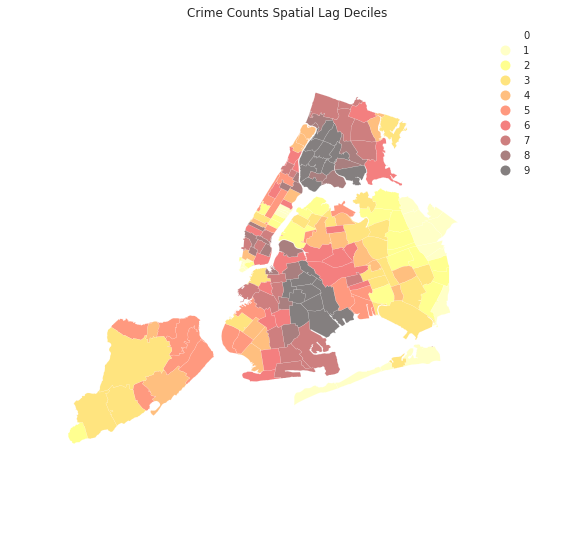

In [117]:
f, ax = plt.subplots(figsize=(9, 9))
zip_shape.assign(cl=CrimeCountLagQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Crime Counts Spatial Lag Deciles")


Figure 3: A plot of the deciles of crime counts in NYC. Indicators of clusters of crime are even stronger around West Bronx and Brownsville, Brooklyn.

## Global  Spatial Autocorrelation

In [118]:
b,a = np.polyfit(CrimeCount, CrimeCountLag, 1)
b,a 

(0.52610342032168667, 13273.729107270161)

### Moran Scatterplot

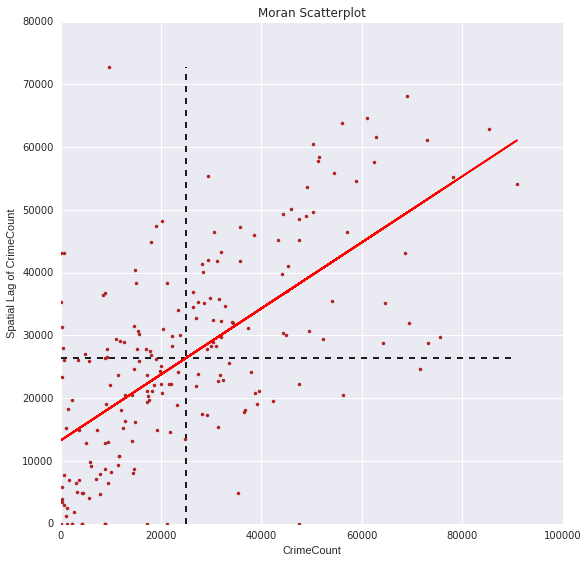

In [119]:
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(CrimeCount, CrimeCountLag, '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
plt.vlines(CrimeCount.mean(), CrimeCountLag.min(), CrimeCountLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(CrimeCountLag.mean(), CrimeCount.min(), CrimeCount.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(CrimeCount, a + b*CrimeCount, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of CrimeCount')
plt.xlabel('CrimeCount')

Figure 4: A Moran Scatterplot for crime counts in NYC. The positive regression slope indicates an overall highly positive level of autocorrelation in the data.

### Moran's I

In [120]:
I_CrimeCount = ps.Moran(CrimeCount, qW_Zip)

In [121]:
I_CrimeCount.I, I_CrimeCount.p_sim

(0.49992686325411473, 0.001)

Thus, the $I$ statistic is $0.5213$ for this data, and has a very small $p$ value. 

In [122]:
I_CrimeCount.sim[0:10]

array([ 0.05760076, -0.12134555,  0.07047936, -0.08981409, -0.06923949,
       -0.00053278,  0.02595898,  0.01414959, -0.00786605,  0.00364728])

### KDEplot of all of the simulated points
the vertical line shows the observed value

In [123]:
import seaborn as sns
plt.rcParams['figure.figsize']=(14,3)

(-0.7, 0.7)

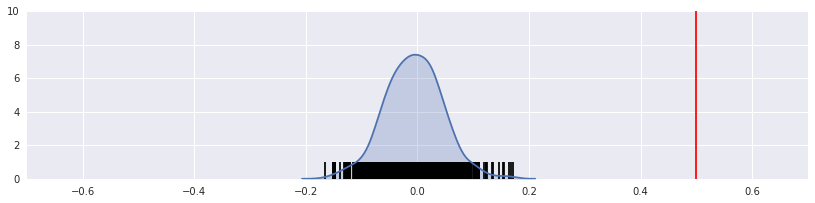

In [124]:
sns.kdeplot(I_CrimeCount.sim, shade=True)
plt.vlines(I_CrimeCount.sim, 0, 1)
plt.vlines(I_CrimeCount.I, 0, 10, 'r')
plt.xlim([-.70, .70])

Figure 5: A plot of the observed Moran's I statistic compared with it's expected value under the null hypothesis of zero overall autocorrelation. Our statistic is very far outside the standard distribution, indicating the presence of autocorrelation.

In the following figure the vertical line is showing if our $I$ statistic were close to our expected value

(-0.7, 0.7)

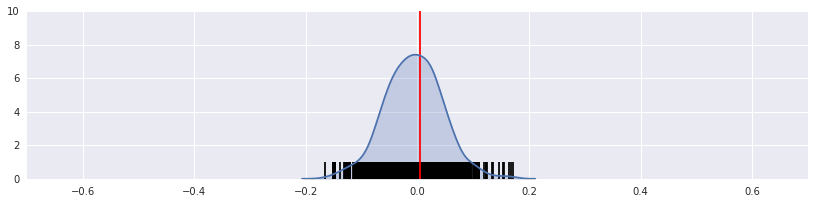

In [125]:
sns.kdeplot(I_CrimeCount.sim, shade=True)
plt.vlines(I_CrimeCount.sim, 0, 1)
plt.vlines(I_CrimeCount.EI+.01, 0, 10, 'r')
plt.xlim([-.70, .70])

Figure 6: A plot of the a hypothetical non-significant Moran's I statistic compared with it's expected value under the null hypothesis of zero overall autocorrelation. In this situation the statistic is inside the standard distribution, indicating that we would not be able to reject the null hypothesis.

## Local  Spatial Autocorrelation

In [126]:
LMo_CrimeCount = ps.Moran_Local(CrimeCount, qW_Zip,permutations=999)

In [127]:
LMo_CrimeCount.Is[0:5], LMo_CrimeCount.p_sim[0:5]

(array([-0.10391249,  0.60164954,  0.30946264,  0.75763665, -0.        ]),
 array([ 0.349,  0.288,  0.282,  0.115,  0.001]))

### LISA (Local Indicators of Spatial Autocorrelation)

In [128]:
sigs = CrimeCount[LMo_CrimeCount.p_sim <= .001]
W_sigs = CrimeCountLag[LMo_CrimeCount.p_sim <= .001]
insigs = CrimeCount[LMo_CrimeCount.p_sim > .001]
W_insigs = CrimeCountLag[LMo_CrimeCount.p_sim > .001]

### Plot Signficant LISA

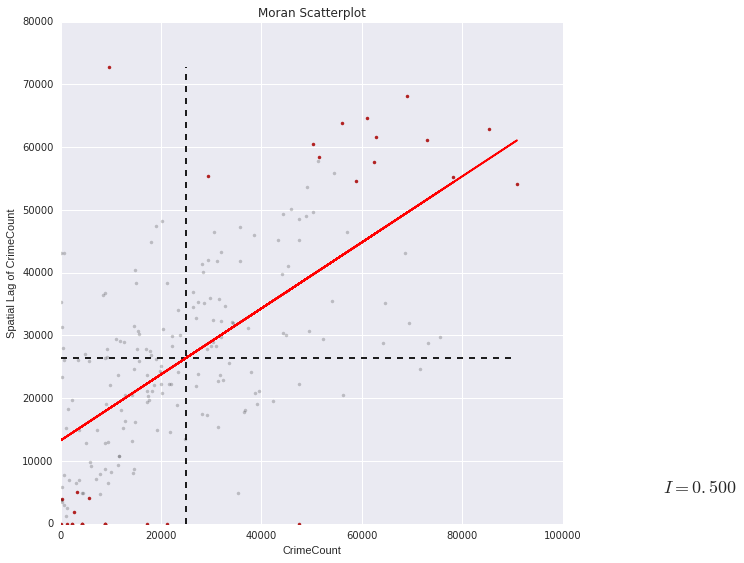

In [129]:
f, ax = plt.subplots(figsize=(9, 9))
plt.plot(sigs, W_sigs, '.', color='firebrick')
plt.plot(insigs, W_insigs, '.k', alpha=.2)
plt.text(s='$I = %.3f$' % I_CrimeCount.I, x=120000, y=5000, fontsize=18)

 # dashed vert at mean of the last year's PCI
plt.vlines(CrimeCount.mean(), CrimeCountLag.min(), CrimeCountLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(CrimeCountLag.mean(), CrimeCount.min(), CrimeCount.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(CrimeCount, a + b*CrimeCount, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of CrimeCount')
plt.xlabel('CrimeCount')


Figure 7: A Moran Scatterplot for crime counts in NYC zipcodes color-coded to indicate which data indicate a significant presence of autocorrelation. There are a large number of significant points in the first and third quadrants, indicating hot and cold spots respectively. There are relatively few significant points in the second quadrant and fourth quadrant, which indicate negative autocorrelation.

### Hot and Cold spots 

In [130]:
sig = LMo_CrimeCount.p_sim < 0.01
hotspots = LMo_CrimeCount.q==1 * sig
coldspots = LMo_CrimeCount.q==3 * sig
print "Number of Hotspots:", hotspots.sum()
print "Number of Coldspots:", coldspots.sum()

Number of Hotspots: 19
Number of Coldspots: 25


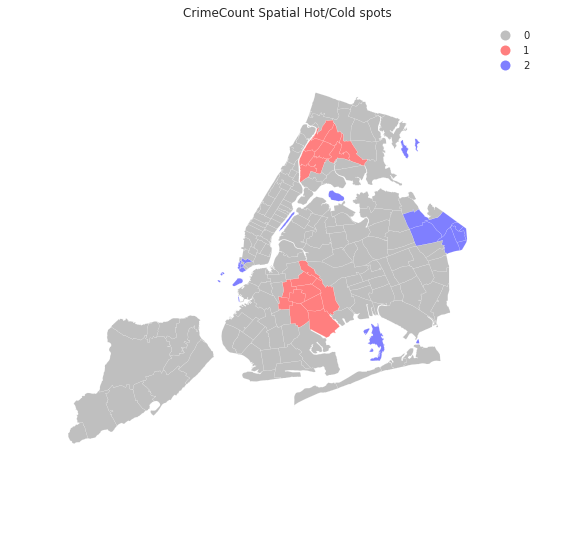

In [131]:
from matplotlib import colors

hcmap = colors.ListedColormap(['grey','red','blue'])
hotcold = hotspots*1 + coldspots*2

f, ax = plt.subplots(figsize=(9, 9))
zip_shape.assign(cl=hotcold).plot(column='cl', categorical=True, 
        k=10, cmap=hcmap, linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("CrimeCount Spatial Hot/Cold spots")

Figure 7: A heatmap of hotspots and cold spots of crime in NYC. The majority of the hotspots are clustered in West Bronx and central Brooklyn centered on Brownsville, while the cold spots centered around Bayside, Queens. The cold spots on Broad Channel, City Island, and the various other islands dotting the city are likely a result of their lower population and relative inaccessibility.